In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv("C:/Users/Lenovo/Downloads/train_bikes.csv")
test = pd.read_csv("C:/Users/Lenovo/Downloads/test_bikes.csv")

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train['datetime']= pd.to_datetime(train['datetime']) 
test['datetime']= pd.to_datetime(test['datetime']) 

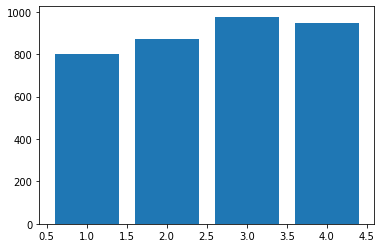

In [11]:
_ = plt.bar(train['season'], train['count'])
_ = plt.show()

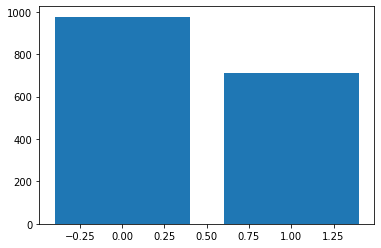

In [12]:
_ = plt.bar(train['holiday'], train['count'])
_ = plt.show()

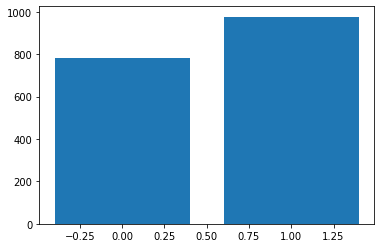

In [13]:
_ = plt.bar(train['workingday'], train['count'])
_ = plt.show()

In [18]:
df_copy = train.copy()

In [21]:
df_copy.loc[:, ('hour')] = df_copy.datetime.dt.hour
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [22]:
#using grouby to extract the data
d =df_copy.groupby(['hour', 'season'])['count'].sum().unstack()
d

season,1,2,3,4
hour,,,,
0,3197,6666,8627,6598
1,2120,4063,5066,4123
2,1413,2677,3583,2586
3,745,1312,1783,1251
4,337,749,922,824
5,1133,2323,2933,2546
6,4828,9460,11033,9377
7,14061,26478,30100,26329
8,28628,44482,46000,45950


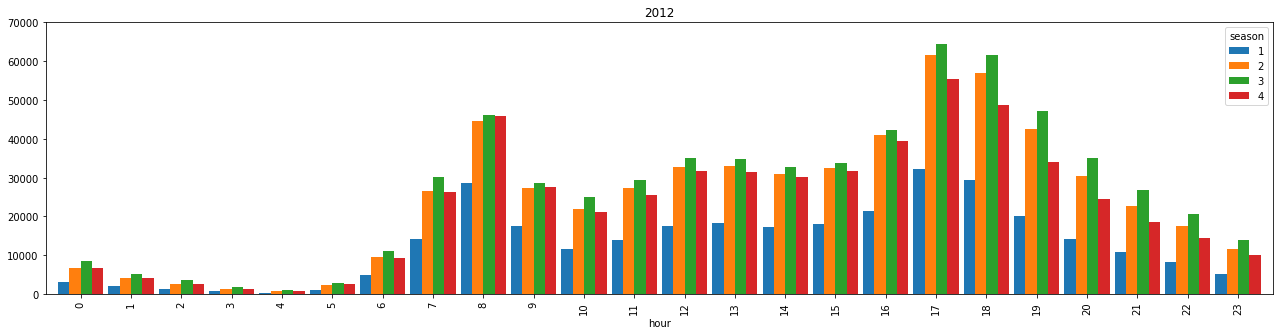

In [24]:
d.plot(kind='bar', ylim=(0, 70000), figsize=(22,5), width=0.9, title="2012")

In [26]:
d = train.copy()


d['year'] = d.datetime.dt.year # extratcing the year
d['month'] = d.datetime.dt.month # extratcing the month
#storing year and month info for every sample in a different column 

#then we must group the data based on our chosen structure 
d = d.groupby(['month', 'year'])['count'].sum().unstack()
d.head()

year,2011,2012
month,,
1,23552,56332
2,32844,66269
3,38735,94766
4,50517,116885
5,79713,120434


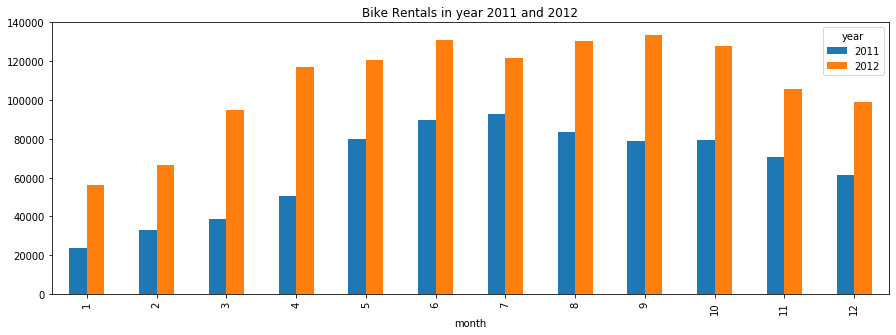

In [28]:
d.plot(kind='bar',  figsize=(15,5), title="Bike Rentals in year 2011 and 2012") 

In [31]:
d =df_copy.groupby('hour')[['count']].mean()
d.head()

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240


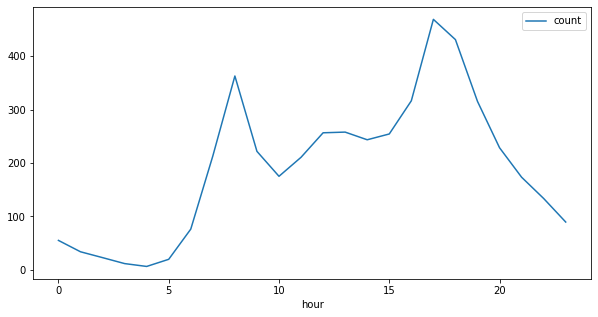

In [32]:
figure,axes = plt.subplots(figsize = (10, 5))
d.plot(kind="line", ax=axes) 

In [70]:
x_train = train.loc[:,'datetime':'windspeed']
y_train = train.loc[:,'count':]

x_test = test.loc[:,'datetime':'windspeed']

In [73]:
x_train.loc[:, ('hour')] = x_train.datetime.dt.hour
x_train.head()

x_test.loc[:, ('hour')] = x_train.datetime.dt.hour
x_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


In [74]:
x_train = train.loc[:,'season':'windspeed']
x_test = test.loc[:,'season':'windspeed']

In [75]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [76]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
y_pred = reg.predict(x_test)

In [78]:
y_pred

array([92.76597555, 79.88338911, 79.88338911, ..., 91.3772732 ,
       91.58654328, 84.85830634])